# **Homework 4**
Create a copy of the notebook to start answering the questions. Name your notebook in the format HW3_lastname_firstname.ipynb to facilitate the grading process.

Answer all the questions, test your code to ensure there are no errors and the results are as expected. Once you have answered all the questions, save the final copy, then go to File-> click on Download.ipynb. Once the local copy has been downloaded, submit your file on Blackboard under the corresponding assignment section. Also provide us a link to your notebook during submission. 

**NOTE:** Please give the TAs the permission to access your notebooks through the links you have provided during submission.

The due date of this homework is 03/14/2021 (Sunday).

Please ensure you follow all the steps mentioned in the homework.

Most questions have sample outputs to help you understand the question.

You can submit your solutions any number of times until the deadline.

The datasets used in this homework can be found in the google drive link below - 

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

Follow the necessary steps to import data to test your code. You can use any method to read your data in the notebook. We will not be grading the methods you use. We will only grade the code from the point where you read the dataset into a pandas dataframe - (pd.read_csv('file_name')) 

Import all the libraries you require in the cell below.

In [ ]:
# import all necessary libraries here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Create a statistical summary of the data in the file “CommuteStLouis.csv”. Plot a histogram of age for the CommuteStLouis data.

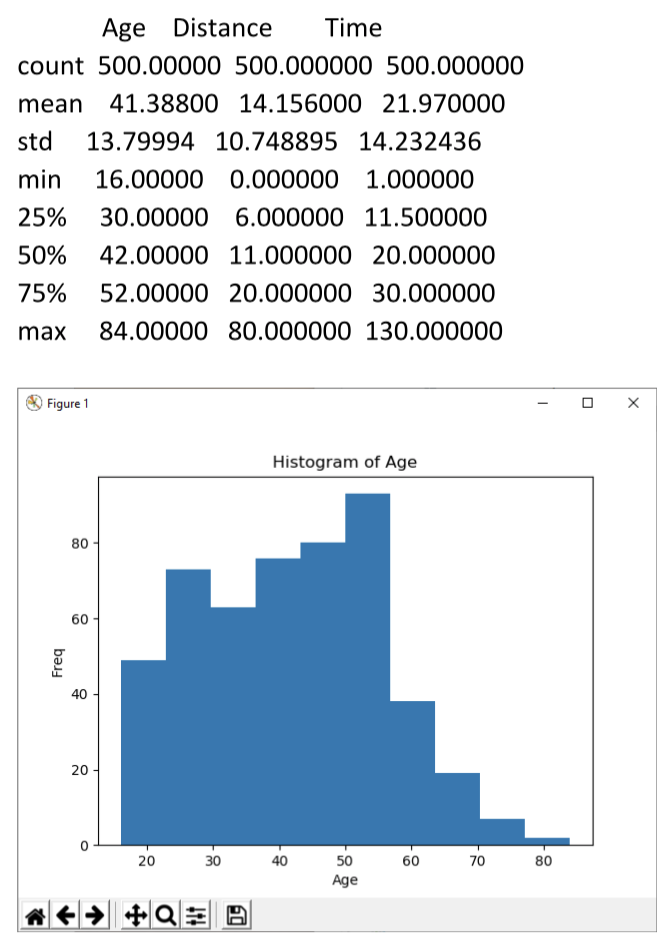

In [ ]:
CommuteStLouis = pd.read_csv("CommuteStLouis.csv")

In [ ]:
# statistical summary
CommuteStLouis[["Age", "Distance","Time"]].describe()

,Age,Distance,Time
count,500.00000,500.000000,500.000000
mean,41.38800,14.156000,21.970000
std,13.79994,10.748895,14.232436
min,16.00000,0.000000,1.000000
25%,30.00000,6.000000,11.500000
50%,42.00000,11.000000,20.000000
75%,52.00000,20.000000,30.000000
max,84.00000,80.000000,130.000000


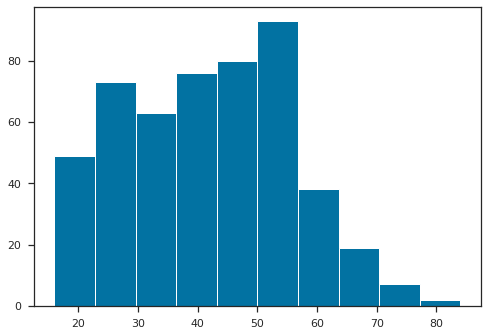

In [ ]:
#histogram of age
CommuteStLouis.Age.hist(grid = False)

### 2. For the data CommuteStLouis:

a. Produce a correlation matrix of age, distance and time. Which two numeric variables are most highly correlated? What is the correlation coefficient for the above pair? Hint: If df is your dataframe then you can use print(df.corr()).

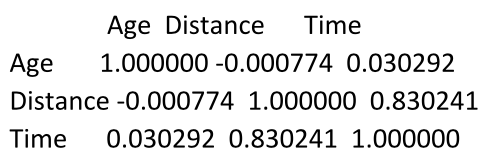

b. Create a scatterplot matrix of the numeric variables in the data. What do the figures in the diagonal going from the top left to the bottom right show? What can you say about the skewness of the various attributes?

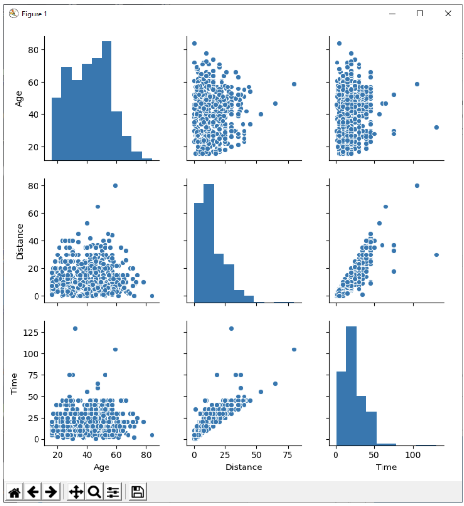

c. Produce a side-by-side boxplot of distance travelled by gender. Do the data in the file indicate that women tend to commute shorter distances?

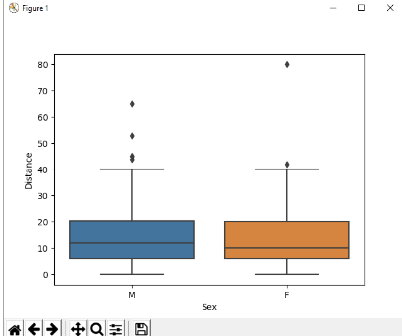

In [ ]:
# a.correlation
CommuteStLouis.corr()
# Distance and Time are highly correlated. Their correlation coeficient is 0.830241

,Age,Distance,Time
Age,1.000000,-0.000774,0.030292
Distance,-0.000774,1.000000,0.830241
Time,0.030292,0.830241,1.000000


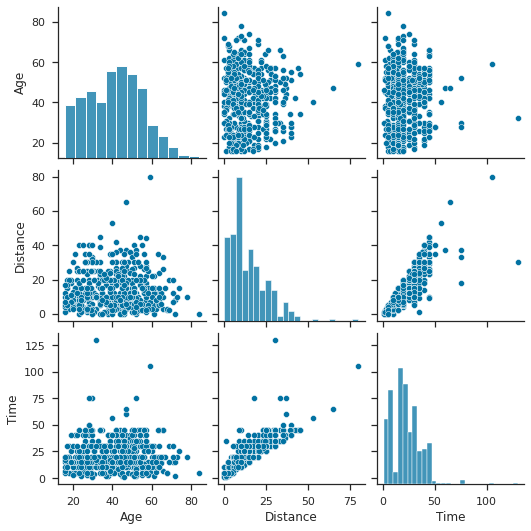

In [ ]:
# b.scatter plot matrix
import seaborn as sns
sns.set_theme(style="ticks", palette=sns.color_palette(), color_codes="b")
sns.pairplot(CommuteStLouis)
# The graphs on the diagonal from top left to bottom right is a bar graph for the frequency of the elements. For example, for "Distance", more of the variables are under 25 distance. 
# According to the bar graphs, all three attributed are right-skewed.

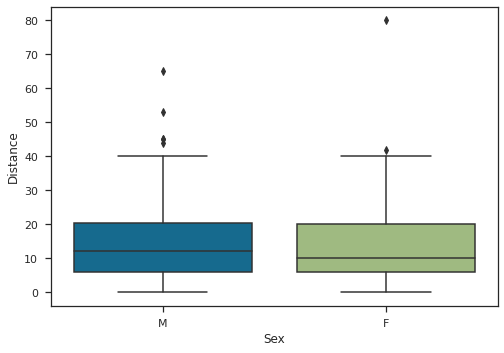

In [ ]:
# c.side-by-side boxplot
import seaborn as sns
Sex_boxplot = sns.boxplot(x="Sex", y="Distance", data=CommuteStLouis)
# according to the graph below, women does tend to commute in a shorter distance. But the difference isn't much between male and female.

### 3. For the pair in Question 2.a plot the scatter plot. Also superimpose a linear regression line on the plot.

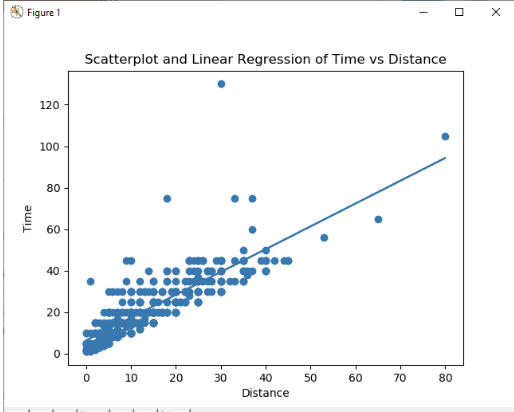

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


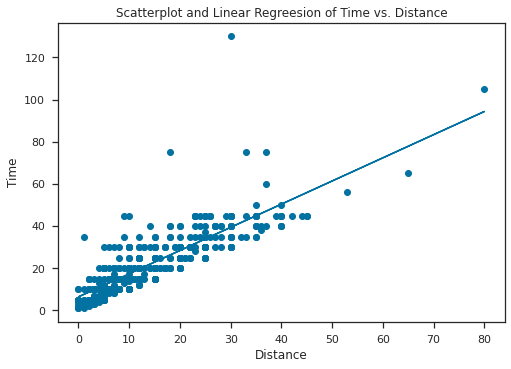

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()
x = CommuteStLouis['Distance']
X = x[:, np.newaxis]
y = CommuteStLouis['Time']
model.fit(X, y)

y_predicted = model.predict(X)
plt.scatter(x, y)
plt.plot(x, y_predicted)
plt.title("Scatterplot and Linear Regreesion of Time vs. Distance")
plt.xlabel("Distance")
plt.ylabel("Time")
plt.show()

x = CommuteStLouis['Distance'].values
X = x.reshape(-1, 1)
y = CommuteStLouis['Time']



### 4. Show the distribution of residuals of the data from Part 3.

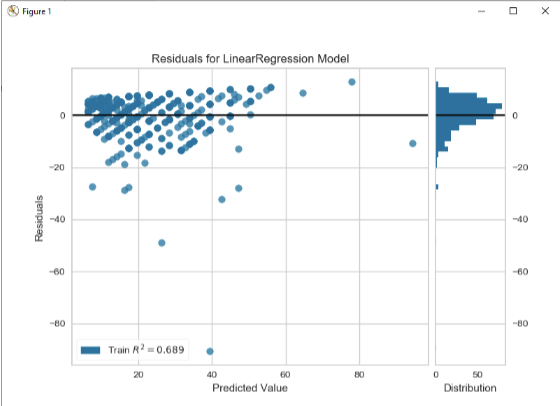

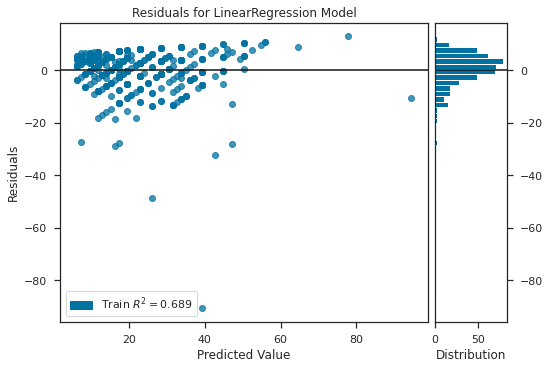

In [ ]:
# Instantiate the linear model and the visualizer
#ridge = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(X, y)
visualizer.poof()